In [163]:
import pandas as pd
df = pd.read_csv('takehome_users.csv',encoding='latin-1')
df2 = pd.read_csv('takehome_user_engagement.csv',encoding='latin-1')

In [164]:
#First, let's convert our "time_stamp" column to datetime format.
df2['time_stamp'] = pd.to_datetime(df2['time_stamp'],format='%Y-%m-%d %H:%M:%S.%f')

#Now we can group up the user data by week.
#df2_agg = df2.set_index('time_stamp')
#df2_agg = df2.groupby(pd.Grouper(freq='1W')).count()
#df2_agg

In [165]:
df2.sort_values(by=['user_id','time_stamp'])

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [166]:
#Let's find out which users are active
logins = 1
active_users = []
for i in range(len(df2)):
  try:
    if df2['user_id'][i+1] == df2['user_id'][i]:
      if pd.Timedelta(df2['time_stamp'][i+1]-df2['time_stamp'][i]).days <= 7 & pd.Timedelta(df2['time_stamp'][i+1]-df2['time_stamp'][i]).days > 0:
        logins += 1
      else:
        if logins >= 3:
          if df2['user_id'][i] in active_users:
            pass
          else:
            active_users.append(df2['user_id'][i])
            logins = 1
        logins = 1
    else:
      logins = 1
  except:
    break

In [167]:
#Now let's adjust the original dataframe
for id in active_users:
  df.loc[df.object_id == id,'active_user'] = True
df['active_user'].fillna(False,inplace=True)

In [168]:
#Cleaning up missing data from our dataset.

from datetime import datetime
df['creation_time'] = pd.to_datetime(df['creation_time'])
df['last_session_creation_time'].fillna(df['creation_time'],inplace=True)

for i in range(len(df)):
  try:
    df['last_session_creation_time'][i] = datetime.fromtimestamp(df['last_session_creation_time'][i])
  except:
    pass

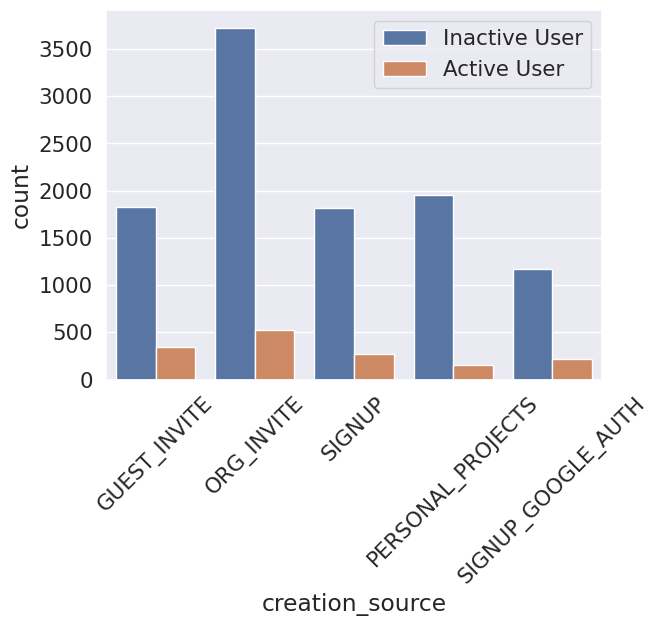

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='creation_source',hue='active_user',data=df)
plt.legend(labels=['Inactive User','Active User'],loc='upper right')
plt.xticks(rotation = 45)
plt.show();

It appears that users who were invited to join another user's personal workspace were the least likely to become active users (7.5%). On the flip side, the category of users who had the highest conversion rate to becoming an active user was users who were invited to an organization as a guest (15.7%)

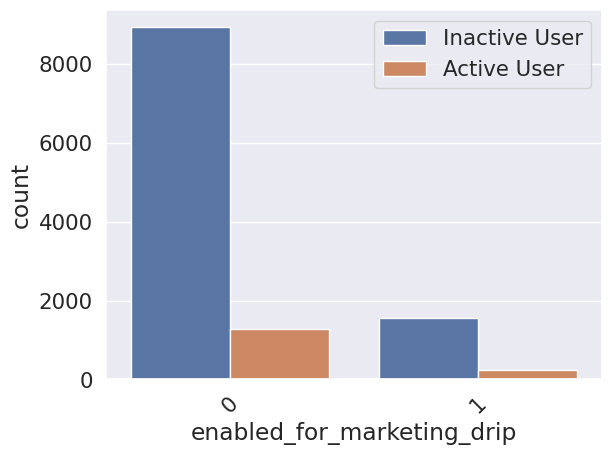

In [170]:
sns.countplot(x='enabled_for_marketing_drip',hue='active_user',data=df)
plt.legend(labels=['Inactive User','Active User'],loc='upper right')
plt.xticks(rotation = 45)
plt.show();

Surprisingly, there is about an equal proportion of active users for both marketing enabled and marketing unenabled users.

In [171]:
df.sort_values(by='last_session_creation_time',ascending=False)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_user
4050,4051,2014-05-29 14:58:50,Holm Alexander,AlexanderOHolm@gustr.com,ORG_INVITE,2014-06-06 14:58:50,0,1,47,5340.0,False
340,341,2013-08-07 23:56:26,Bentley Katie,KatieBentley@gustr.com,GUEST_INVITE,2014-06-04 23:56:26,1,1,2,9323.0,True
9557,9558,2012-10-05 23:46:31,Christiansen Anders,jzxqmman@pjcjm.com,SIGNUP,2014-06-04 23:46:31,0,0,80,NaN,True
9324,9325,2012-09-28 23:34:04,Taylor Steven,StevenFTaylor@gmail.com,SIGNUP_GOOGLE_AUTH,2014-06-04 23:34:04,0,0,252,NaN,True
4624,4625,2013-02-17 23:32:13,Wannemaker Tim,goyfedfr@sqclx.com,ORG_INVITE,2014-06-04 23:32:13,0,0,0,8927.0,True
...,...,...,...,...,...,...,...,...,...,...,...
4399,4400,2012-05-31 22:50:17,Jaeger Max,MaxJaeger@cuvox.de,PERSONAL_PROJECTS,2012-05-31 22:50:17,1,0,76,NaN,False
4319,4320,2012-05-31 21:26:50,Frey Nadine,NadineFrey@hotmail.com,PERSONAL_PROJECTS,2012-05-31 21:26:50,1,0,197,NaN,False
7200,7201,2012-05-31 18:12:49,Barros Diego,DiegoAraujoBarros@jourrapide.com,GUEST_INVITE,2012-05-31 18:12:49,0,0,401,7414.0,False
9898,9899,2012-05-31 17:19:37,Jørgensen Sofie,SofieNJrgensen@yahoo.com,ORG_INVITE,2012-05-31 17:19:37,0,0,138,9899.0,False


In [172]:
#Let's create a new feature which represents how many days it's been since the user's last login. We'll assume the present day is the most recent day available in the dataframe (June 6, 2014)
df['time_since_last_login'] = pd.Series()
for i in range(len(df)):
  df['time_since_last_login'][i] = pd.Timedelta(datetime(2014,6,6)-df['last_session_creation_time'][i]).days

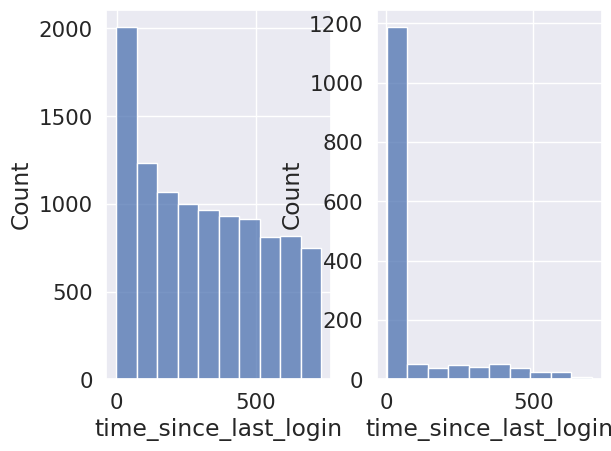

In [173]:
f, axes = plt.subplots(1, 2)
sns.histplot(df[df['active_user']==0]['time_since_last_login'],ax=axes[0],bins=10)
sns.histplot(df[df['active_user']==1]['time_since_last_login'],ax=axes[1],bins=10)
plt.show();

We see that there are a good number of inactive users who haven't logged in for months and/or even years. However, an exceeding majority of active users have all recently logged in and very few who would've been considered active in the past by having 3+ logins in a week would not still be active by the present day. **The recency of the user's last login is a key factor in predicting future user adoption.**

Let's now try building a XG Boost model and then performing SHAP analysis to find out which features were the most influential.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  object        
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  active_user                 12000 non-null  bool          
 11  time_since_last_login       12000 non-null  float64   

In [175]:
from sklearn.model_selection import train_test_split
df = pd.get_dummies(df,columns=['creation_source','org_id','invited_by_user_id'])

X = df.drop(columns= ['name','email','active_user'])
y = df['active_user']

#Next, let's sample an equal proportion of both positive and negative cases so our model can fairly learn between the two cases.
inactive = y[y.eq(0)==True]
active = y[y.eq(1)==True]
inactive_sample = inactive.sample(n=1510,random_state = 42)
X2_inactive = X.iloc[inactive_sample.index]
X2_active = X.iloc[active.index]
X2 = X2_inactive.append(X2_active)
y2 = inactive.append(active)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import traceback
import re
import pandas.core.algorithms as algos
import warnings
warnings.filterwarnings("ignore")
from pandas import Series
from datetime import datetime
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
            
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = np.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [177]:
final_iv, IV = data_vars(X_train,y_train)
IV.sort_values(by='IV',ascending=False)

,VAR_NAME,IV
2991,time_since_last_login,2.289305
2,creation_source_PERSONAL_PROJECTS,0.049386
2574,org_id_0,0.037325
0,creation_source_GUEST_INVITE,0.015742
2894,org_id_387,0.012274
...,...,...
1020,invited_by_user_id_3572.0,0.000000
1716,invited_by_user_id_6336.0,0.000000
1024,invited_by_user_id_3600.0,0.000000
1721,invited_by_user_id_6371.0,0.000000


In [178]:
features = list(IV[IV['IV'] >= 0.01]['VAR_NAME'])
X2 = X_train[features]
display(X2.shape)
X2.head()

(9600, 6)

,creation_source_GUEST_INVITE,creation_source_PERSONAL_PROJECTS,org_id_0,org_id_3,org_id_387,time_since_last_login
9182,0,0,0,0,0,358.0
11091,0,1,0,0,0,133.0
6428,0,1,0,0,0,157.0
288,0,1,0,0,0,140.0
2626,1,0,0,0,0,375.0


In [179]:
def iterate_vif(df, vif_threshold=5, max_vif=6):
    count = 0
    while max_vif > vif_threshold:
        count += 1
        print("Iteration # "+str(count))
        vif = pd.DataFrame()
        vif["VIFactor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        vif["features"] = df.columns
        
        if vif['VIFactor'].max() > vif_threshold:
            print('Removing %s with VIF of %f' % (vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], vif['VIFactor'].max()))
            df = df.drop(vif[vif['VIFactor'] == vif['VIFactor'].max()]['features'].values[0], axis=1)
            max_vif = vif['VIFactor'].max()
        else:
            print('Complete')
            return df, vif.sort_values('VIFactor')  

X1 = X2._get_numeric_data()
final_df, final_vif = iterate_vif(X1)

Iteration # 1
Complete


In [180]:
#Last step: Let's trim our data for outliers like we did earlier in our EDA visualizations.
final_df = final_df[(np.abs(stats.zscore(final_df)) < 2.5).all(axis=1)]

#Now let's adjust our training and test data to reflect our preprocessing.
X_train = X_train[final_df.columns]
X_test = X_test[final_df.columns]

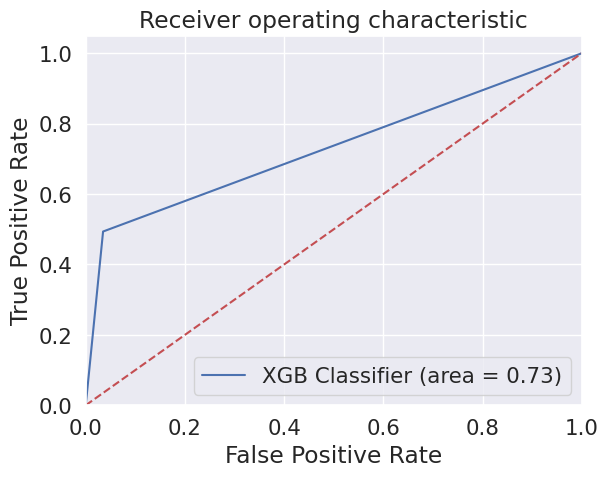

XG Boost: Accuracy=0.904
XG Boost: f1-score=0.898
XG Boost: ROC Score=0.729


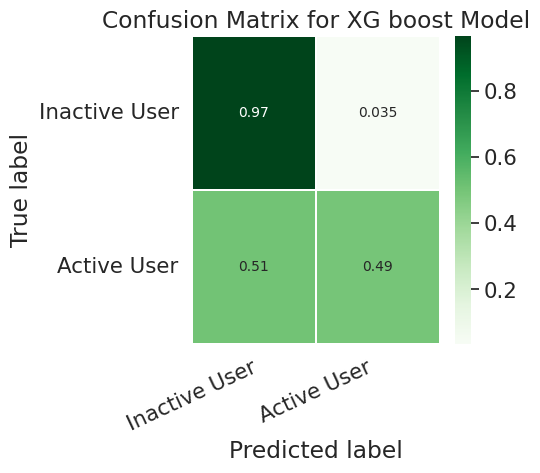

In [181]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
xgb = XGBClassifier(objective='binary:logistic',use_label_encoder=False,eval_metric='auc')
xgb_model = xgb.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)

ac_xgb = accuracy_score(y_test, y_pred)
f1_xgb = f1_score(y_test, y_pred, average='weighted')
cm_xgb = confusion_matrix(y_test, y_pred)
roc_xgb = roc_auc_score(y_test, y_pred)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='XGB Classifier (area = %0.2f)' % roc_xgb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('XG Boost: Accuracy=%.3f' % (ac_xgb))
print('XG Boost: f1-score=%.3f' % (f1_xgb))
print('XG Boost: ROC Score=%.3f' % (roc_xgb))

cm_xgb = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(4,4))
sns.set(font_scale=1.4)
sns.heatmap(cm_xgb, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Inactive User', 'Active User']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for XG boost Model')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


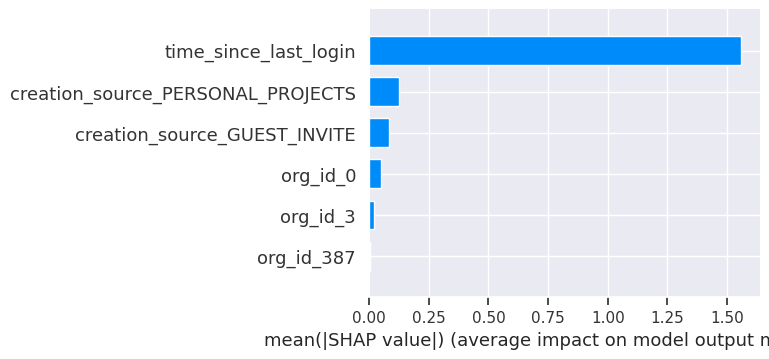

In [182]:
!pip install shap
import shap
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

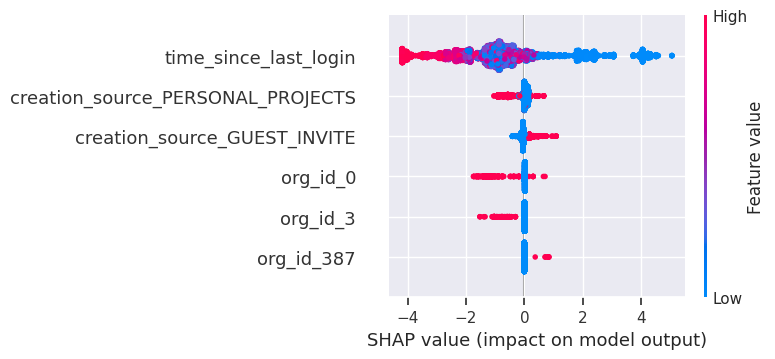

In [183]:
shap.summary_plot(shap_values, X_train)

Just as we suspected - the most important feature in predicting a user's future adoption/activeness is primarily dependent on how long it has been since his or her last login. Whether or not a user was invited as part of another user's personal project or if they were invited as a guest is also influential like we observed earlier. However, a new point of interest here is that there are certain organizations which tend to have more active or inactive users. Being from organization ID 0 or 3 makes it more likely that the user is an inactive one and being from organization ID 387 makes it more likely that the user is an active one.